<a href="https://colab.research.google.com/github/kohtetap/MMDT_2025_MLAI101/blob/htet_aung_phyo/Regression/Lab1_grad_des.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# importing necessary library package and module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math

#importing data
df=pd.read_csv('/Advertising.csv', index_col = 0)

#inspecting dataframe
print(df.columns) #4 columns
print(df.head(5))
print(df.info())  #no NaN, only numerical columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')
      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB
None


In [54]:
# setting radio column as independent variable (feature) and sales as dependet variable(target)
sel_program = 'radio'
X=df[[sel_program]] # feature, type is dataframe

Y=df['sales'] #target, type is series

# standardization by subracting mean and diving by standard deviation

Y=np.array((Y-Y.mean())/Y.std()) # setting numpy array

X=X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0) # X is still Dataframe

In [13]:
def initialize(dim):
    ''' setting initial parameters
    b : intecept, floating number between 0 and 1
    a : weight(slope), floating number between 0 and 1
    dim: input parameter to define a as single feature or multiple feature '''
    b=random.random()
    a=np.random.rand(dim)
    return b,a

In [14]:
def predict_Y(b,a,X):
    ''' predicting y using equation y_cat = aX+b
    np.dot is used for X is array type '''
    return b + np.dot(X,a)

In [23]:
def get_cost(Y,Y_hat):
    ''' finding mean squared error'''
    Y_resd=Y-Y_hat
    #return np.sum(np.dot(Y_resd.T,Y_resd))/len(Y)
    return np.sum(Y_resd**2)/len(Y)

In [46]:
def update_theta(x, y, y_hat, b_0, theta_o, learning_rate):
    '''
    theta_o : a, weight/slope
    b_0     : b, intercept
    '''
    #db = (np.sum(y - y_hat) * (-2)) / len(y)
    #dw = (np.dot((y - y_hat), x) * (-2)) / len(y)

    db=(np.sum(y_hat-y)*2)/len(y)
    dw=(np.dot((y_hat-y),x)*2)/len(y)

    b_1 = b_0 - learning_rate * db
    theta_1 = theta_o - learning_rate * dw
    return b_1, theta_1


In [47]:
def run_gradient_descent(X,Y,alpha,num_iterations):
    ''' gradient descent'''
    # setting error difference to stop iteration
    tolerance = 1e-06

    # initializing b and theta/a, X.shape[1] is column number it will be dim in called function
    b,theta=initialize(X.shape[1])

    # creating dataframe with column name
    gd_iterations_df=pd.DataFrame(columns=['iteration','value_b', 'value_weight', 'cost'])
    result_idx=0
    prev_cost =0

    for iter_num in range(num_iterations):
        #predicting y
        Y_hat=predict_Y(b,theta,X)

        #calculating cost
        this_cost=get_cost(Y,Y_hat)

        #setting b and theta
        prev_b=b
        prev_theta=theta

        #updating theta and b, alpha is learning rate which is hyperparameter
        b,theta=update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)

        #adding data into gradient dataframe
        gd_iterations_df.loc[result_idx]=[iter_num,b, theta[0], this_cost]

        #increasing index for adding data to dataframe
        result_idx=result_idx+1

        # checking error difference to stop iteration
        if (np.abs(this_cost  - prev_cost )<= tolerance):
            break

        # updating error difference
        prev_cost = this_cost

        # returning dataframe, b, and theta
    return gd_iterations_df,b,theta

#calcluating
gd_iterations_df,b,theta=run_gradient_descent(X,Y,alpha=0.01,num_iterations=400)

print(gd_iterations_df)

     iteration   value_b  value_weight      cost
0          0.0  0.497399      0.519378  0.925582
1          1.0  0.487451      0.520509  0.915248
2          2.0  0.477702      0.521618  0.905324
3          3.0  0.468148      0.522705  0.895793
4          4.0  0.458785      0.523770  0.886640
..         ...       ...           ...       ...
226      226.0  0.005174      0.575618  0.664656
227      227.0  0.005070      0.575630  0.664655
228      228.0  0.004969      0.575641  0.664654
229      229.0  0.004869      0.575653  0.664653
230      230.0  0.004772      0.575664  0.664652

[231 rows x 4 columns]


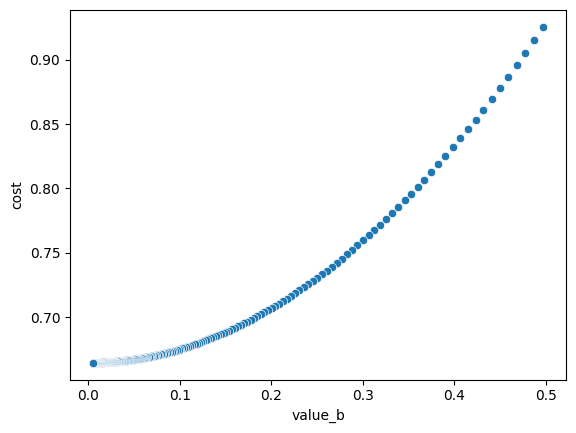

In [48]:
sns.scatterplot(data=gd_iterations_df,x='value_b',y='cost')
plt.show()

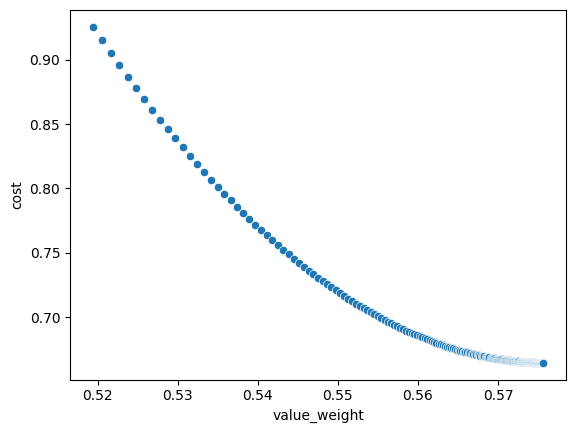

In [49]:
sns.scatterplot(data=gd_iterations_df, x="value_weight", y="cost")
plt.show()

In [50]:
# finding idex for minimum value of cost
idx = gd_iterations_df['cost'].argmin()

# best parameter is when cost is minimum
best_parameters = gd_iterations_df.loc[idx, ['value_b', 'value_weight']]
print(best_parameters)


value_b         0.004772
value_weight    0.575664
Name: 230, dtype: float64


In [56]:
# finding y values using initial parameter and best parameter
x = df[sel_program] # X is standardized value, so use x which is acutal vale

y_ini = gd_iterations_df.loc[0, 'value_b'] + gd_iterations_df.loc[0, 'value_weight']*x
y_best = gd_iterations_df.loc[idx, 'value_b'] + gd_iterations_df.loc[idx, 'value_weight']*x
print(y_ini)
print(y_best)

1      20.129886
2      20.908953
3      24.336847
4      21.947709
5       6.106681
         ...    
196     2.419097
197     3.042351
198     5.327614
199    22.311273
200     4.964049
Name: radio, Length: 200, dtype: float64
1      21.764881
2      22.628377
3      26.427762
4      23.779706
5       6.221946
         ...    
196     2.134730
197     2.825527
198     5.358450
199    24.182671
200     4.955485
Name: radio, Length: 200, dtype: float64


In [72]:
#y_p = gd_iterations_df.loc[idx, 'value_b'] + gd_iterations_df.loc[idx, 'value_weight']*X #predicated y for standardize value


#caluclating mean absoulte error
mae = np.sum(np.abs(Y- y_best))/len(Y)

#comparing mean absolute error and mean squared error
print(sel_program, error, get_cost(Y, y_best))

print(np.sum(((np.abs(Y- y_best))>0.5)))


radio 0.635764550374403 243.35701225113021
200


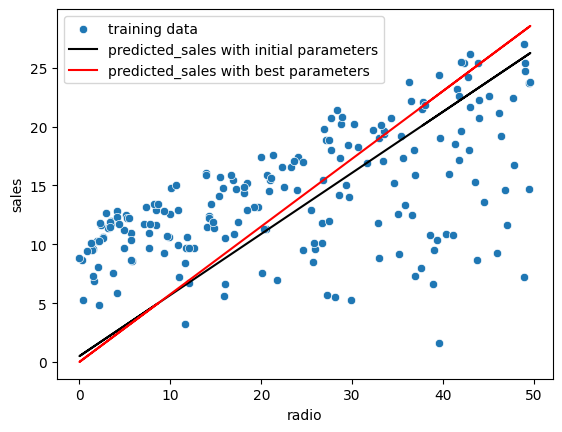

In [73]:
sns.scatterplot(data=df, x=sel_program, y="sales")
plt.plot( x,  y_ini, 'k', x, y_best, 'r')
plt.legend(['training data', 'predicted_sales with initial parameters',
            'predicted_sales with best parameters'])
plt.show()